# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set units to metric 
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | island harbour
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | severo-yeniseyskiy
Processing Record 14 of Set 1 | chauk
Processing Record 15 of Set 1 | buka
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | nadi
Processing Record 18 of Set 1 | tostado
Processing Record 19 of Set 1 | saveh
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | veymandoo
City not found. Skipping...
Processing Record 22 of Set 1 | bre

Processing Record 35 of Set 4 | arhribs
Processing Record 36 of Set 4 | alta
Processing Record 37 of Set 4 | byron bay
Processing Record 38 of Set 4 | kralendijk
Processing Record 39 of Set 4 | harper
Processing Record 40 of Set 4 | kapit
Processing Record 41 of Set 4 | el bauga
Processing Record 42 of Set 4 | kuanda
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | hermanus
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | levuka
Processing Record 48 of Set 4 | tara
Processing Record 49 of Set 4 | mahina
Processing Record 0 of Set 5 | launceston
Processing Record 1 of Set 5 | gisborne
Processing Record 2 of Set 5 | keflavik
Processing Record 3 of Set 5 | pokachi
Processing Record 4 of Set 5 | boa vista
Processing Record 5 of Set 5 | lospalos
Processing Record 6 of Set 5 | sovetskiy
City not found. Skipping...
Processing Record 7 of Set 5 | dalandzadgad
Processing Record 8 of Set 5 | isokyro
Pro

Processing Record 29 of Set 8 | north bend
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | mao
Processing Record 32 of Set 8 | ceerigaabo
Processing Record 33 of Set 8 | sinabang
Processing Record 34 of Set 8 | stavrovo
Processing Record 35 of Set 8 | el calafate
Processing Record 36 of Set 8 | aldinga beach
Processing Record 37 of Set 8 | esmeraldas
Processing Record 38 of Set 8 | trenggalek
Processing Record 39 of Set 8 | kolonia town
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | bentiu
Processing Record 42 of Set 8 | yarega
Processing Record 43 of Set 8 | minas de marcona
Processing Record 44 of Set 8 | ambato boeny
Processing Record 45 of Set 8 | tolanaro
Processing Record 46 of Set 8 | san juan de miraflores
Processing Record 47 of Set 8 | rouissat
Processing Record 48 of Set 8 | arraial do cabo
Processing Record 49 of Set 8 | debre werk'
Processing Record 0 of Set 9 | kilindoni
Processing Record 1 of Set 9 | sao gabriel da ca

Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | iwaki
Processing Record 23 of Set 12 | richards bay
Processing Record 24 of Set 12 | isabela
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | ginir
Processing Record 27 of Set 12 | shihezi
Processing Record 28 of Set 12 | bohicon
Processing Record 29 of Set 12 | vapnyarka
Processing Record 30 of Set 12 | gasa
Processing Record 31 of Set 12 | howrah
Processing Record 32 of Set 12 | mana
-----------------------------
Data Retrieval Complete      
-----------------------------


In [64]:
#base_url = "https://api.openweathermap.org/data/2.5/weather?q=" 
#city_url = base_url + "Algiers" + "&appid=" + weather_api_key
#city_weather = requests.get(city_url).json()
#city_weather

In [80]:
# Convert the cities weather data into a Pandas DataFrame
index = range(len(city_data))

city_data_df = pd.DataFrame(city_data, index=index)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,23.23,58,94,0.89,US,1694972078
1,adamstown,-25.0660,-130.1015,19.06,66,99,5.69,PN,1694972078
2,yellowknife,62.4560,-114.3525,14.12,83,100,5.66,CA,1694972078
3,college,64.8569,-147.8028,8.37,88,100,4.63,US,1694972079
4,island harbour,50.7240,-1.2758,20.08,93,54,4.47,GB,1694972079


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.23,58,94,0.89,US,1694972078
1,adamstown,-25.0660,-130.1015,19.06,66,99,5.69,PN,1694972078
2,yellowknife,62.4560,-114.3525,14.12,83,100,5.66,CA,1694972078
3,college,64.8569,-147.8028,8.37,88,100,4.63,US,1694972079
4,island harbour,50.7240,-1.2758,20.08,93,54,4.47,GB,1694972079


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

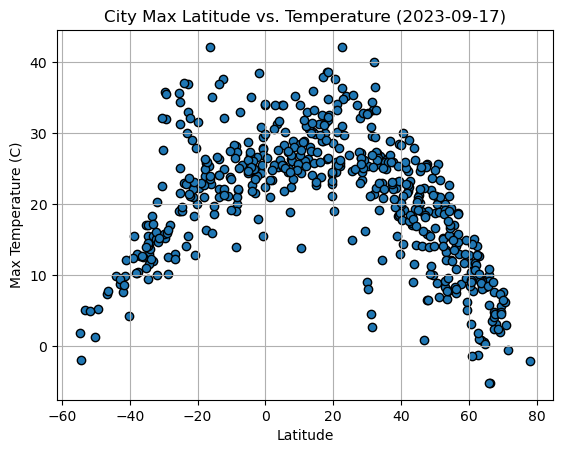

In [100]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="tab:blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-09-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

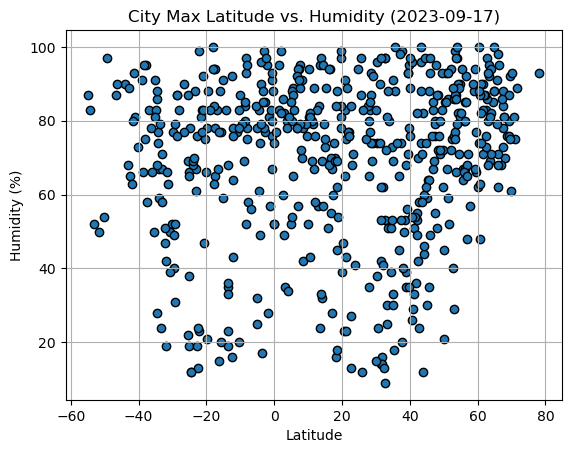

In [102]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="tab:blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-09-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

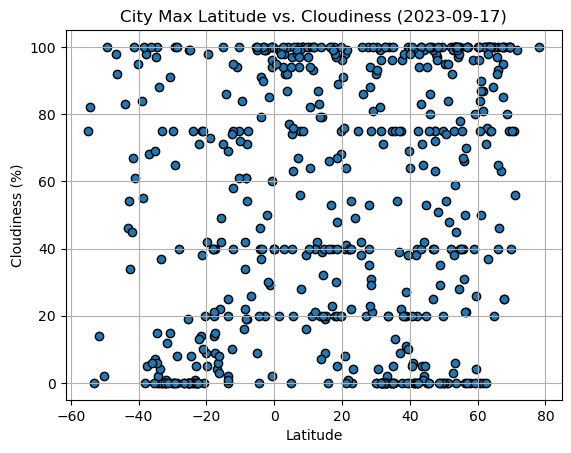

In [103]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="tab:blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-09-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

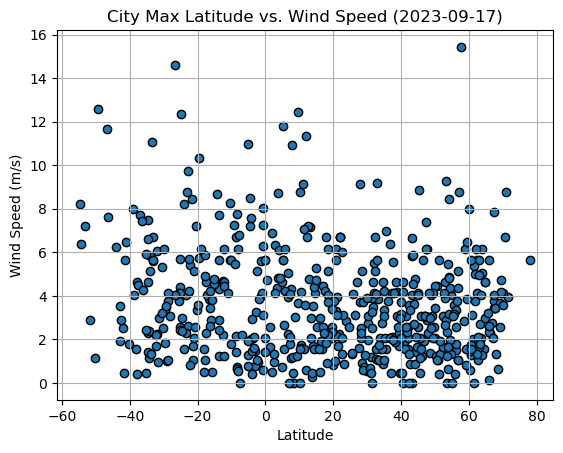

In [104]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="tab:blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-09-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [168]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    # The below variables figure out the best position for your annotation based on the data range:
    x_annotation = min(x_values) + 0.1 * (max(x_values) - min(x_values))
    y_annotation = min(y_values) + 0.9 * (max(y_values) - min(y_values))
    plt.annotate(line_eq,(x_annotation, y_annotation),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [169]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.23,58,94,0.89,US,1694972078
2,yellowknife,62.4560,-114.3525,14.12,83,100,5.66,CA,1694972078
3,college,64.8569,-147.8028,8.37,88,100,4.63,US,1694972079
4,island harbour,50.7240,-1.2758,20.08,93,54,4.47,GB,1694972079
6,san patricio,28.0170,-97.5169,32.13,35,53,3.70,US,1694972079


In [170]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,19.06,66,99,5.69,PN,1694972078
5,edinburgh of the seven seas,-37.0676,-12.3116,12.74,83,68,7.70,SH,1694972079
15,uturoa,-16.7333,-151.4333,25.32,83,4,3.87,PF,1694972080
16,nadi,-17.8000,177.4167,24.00,94,20,1.03,FJ,1694971837
17,tostado,-29.2320,-61.7692,31.95,31,65,3.49,AR,1694972081


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6093261103243113


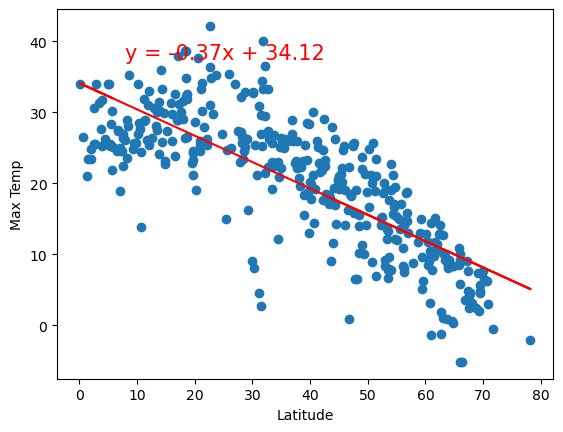

In [171]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-squared is: 0.46768903541047585


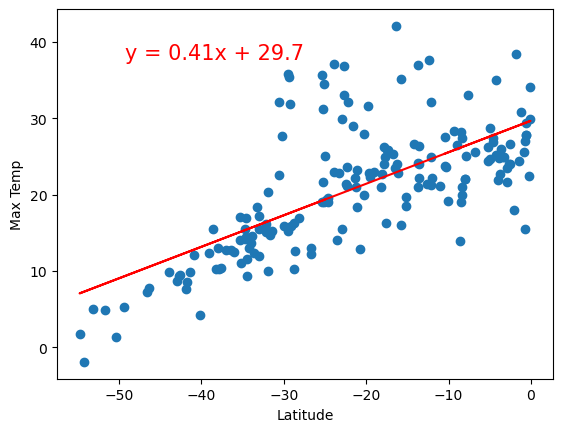

In [172]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.021796593319196925


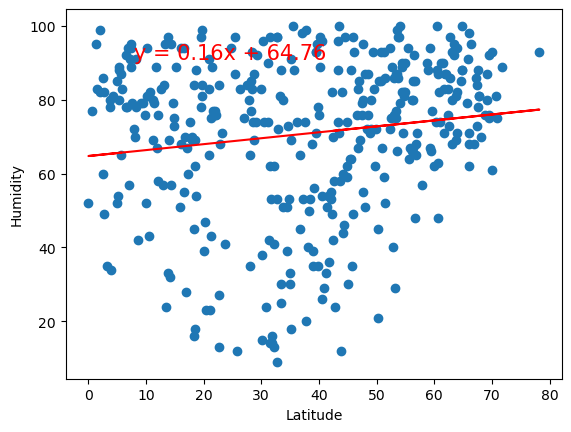

In [173]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-squared is: 0.0004418868837723466


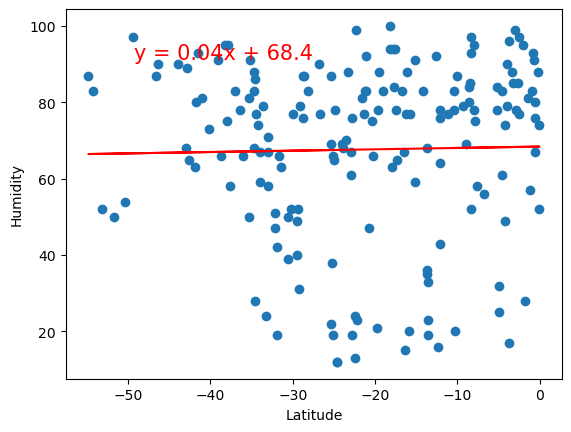

In [174]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0028483673912716757


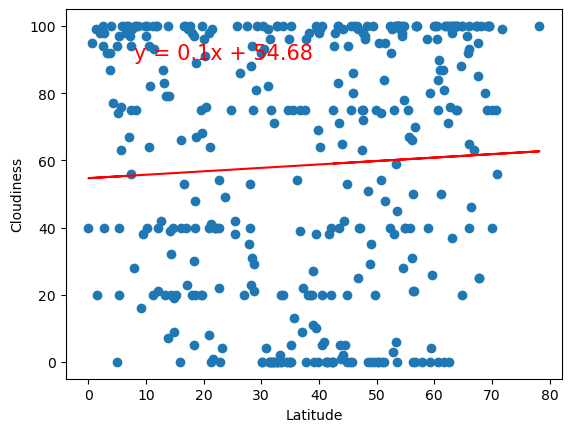

In [175]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-squared is: 0.02200768512241312


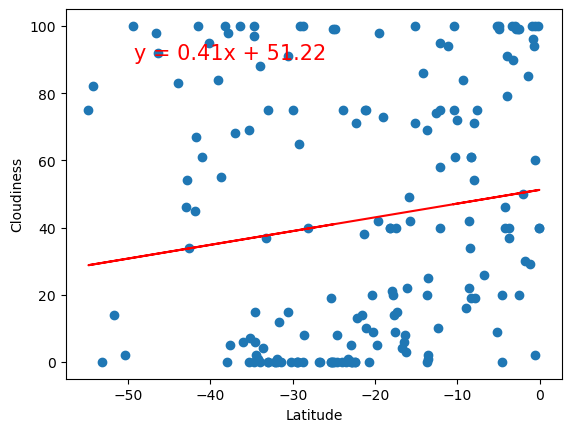

In [176]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001368921357579526


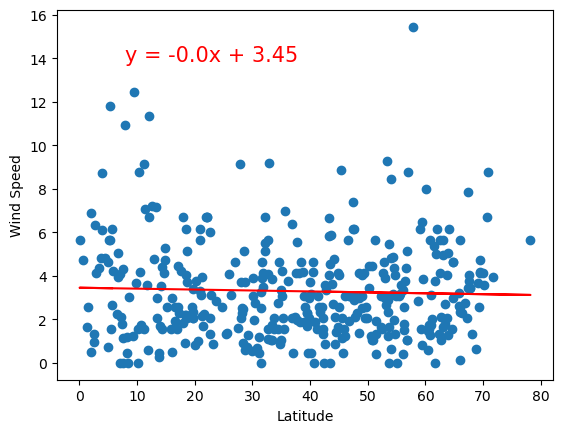

In [177]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-squared is: 0.02189630447325624


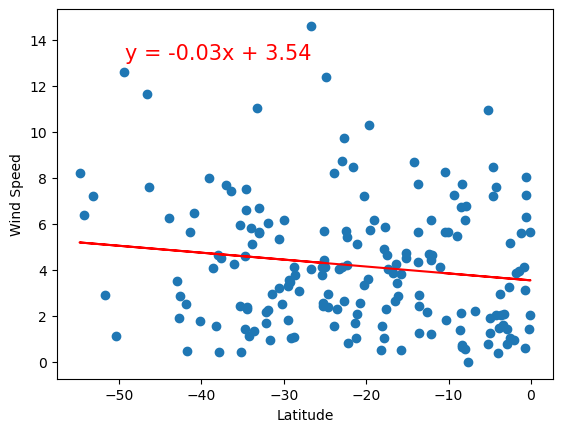

In [178]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE